### Importing all the required libraries

In [7]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Visualization
import matplotlib.pyplot as plt
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#System
import os
import seaborn as sns
from random import randint
from sklearn import decomposition
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### Loading Image Data and Scaling

In [9]:
from PIL import Image
def loadingImagesFromFolder(folder):
    images = []
    for filename in os.listdir(folder):
        image = Image.open(os.path.join(folder,filename))
        image = np.array(image.convert('L'))
        image = image / 255
        print(image.shape)
        print(image)  
        if image is not None:
            images.append(image)
    return images

In [10]:
data=[]
image_data = "data"
for i in range(1,41):
    for j in loadingImagesFromFolder(os.path.join(image_data,"s"+str(i))):
        data.append(list((j,i)))

(112, 92)
[[0.18823529 0.19215686 0.17647059 ... 0.21960784 0.21960784 0.21176471]
 [0.17647059 0.20392157 0.15294118 ... 0.20392157 0.19607843 0.2       ]
 [0.17647059 0.19607843 0.16470588 ... 0.18823529 0.20784314 0.19607843]
 ...
 [0.19607843 0.18823529 0.19607843 ... 0.17647059 0.18039216 0.18039216]
 [0.17647059 0.21176471 0.19215686 ... 0.18039216 0.18431373 0.18431373]
 [0.2        0.2        0.2        ... 0.18431373 0.18039216 0.18039216]]
(112, 92)
[[0.13333333 0.13333333 0.12941176 ... 0.00392157 0.00392157 0.00392157]
 [0.1372549  0.11764706 0.1254902  ... 0.14901961 0.18431373 0.15294118]
 [0.13333333 0.10980392 0.12156863 ... 0.21568627 0.23137255 0.19215686]
 ...
 [0.11764706 0.11372549 0.12156863 ... 0.1372549  0.14509804 0.16078431]
 [0.12156863 0.11372549 0.1254902  ... 0.16470588 0.13333333 0.15294118]
 [0.10980392 0.12941176 0.10588235 ... 0.14509804 0.15686275 0.12941176]]
(112, 92)
[[0.23529412 0.23529412 0.24313725 ... 0.15686275 0.20784314 0.18039216]
 [0.22745

(112, 92)
[[0.54509804 0.56078431 0.57254902 ... 0.56862745 0.57254902 0.57254902]
 [0.55294118 0.58039216 0.55294118 ... 0.56078431 0.56078431 0.56470588]
 [0.56862745 0.55686275 0.55294118 ... 0.56078431 0.57254902 0.56862745]
 ...
 [0.66666667 0.79607843 0.85490196 ... 0.31372549 0.30196078 0.31372549]
 [0.87058824 0.87843137 0.8745098  ... 0.32941176 0.29411765 0.32941176]
 [0.87058824 0.8745098  0.86666667 ... 0.3254902  0.31764706 0.29019608]]
(112, 92)
[[0.61176471 0.61960784 0.60784314 ... 0.6        0.58431373 0.59607843]
 [0.61176471 0.60784314 0.61176471 ... 0.59607843 0.59607843 0.59607843]
 [0.60784314 0.61176471 0.60784314 ... 0.58823529 0.59607843 0.58039216]
 ...
 [0.52156863 0.55686275 0.59215686 ... 0.44313725 0.44313725 0.43921569]
 [0.61960784 0.77647059 0.84705882 ... 0.43529412 0.43529412 0.43921569]
 [0.85882353 0.85882353 0.85098039 ... 0.44313725 0.43137255 0.42352941]]
(112, 92)
[[0.6        0.59607843 0.59607843 ... 0.59215686 0.59215686 0.58431373]
 [0.6    

[[0.5254902  0.54117647 0.53333333 ... 0.50588235 0.51372549 0.49803922]
 [0.5254902  0.52941176 0.52941176 ... 0.50980392 0.50980392 0.50588235]
 [0.52156863 0.5254902  0.52941176 ... 0.49803922 0.51764706 0.52156863]
 ...
 [0.09803922 0.0745098  0.08235294 ... 0.10588235 0.22352941 0.31764706]
 [0.10196078 0.08627451 0.0745098  ... 0.11764706 0.27843137 0.31764706]
 [0.08235294 0.09803922 0.08627451 ... 0.21568627 0.30980392 0.31764706]]
(112, 92)
[[0.52941176 0.52156863 0.53333333 ... 0.50588235 0.51372549 0.50588235]
 [0.52941176 0.54509804 0.51764706 ... 0.51372549 0.52156863 0.50588235]
 [0.5372549  0.5254902  0.5372549  ... 0.51372549 0.51372549 0.50980392]
 ...
 [0.10196078 0.09019608 0.11372549 ... 0.05490196 0.08235294 0.06666667]
 [0.12156863 0.07843137 0.11764706 ... 0.06666667 0.07843137 0.06666667]
 [0.11372549 0.08235294 0.10588235 ... 0.07058824 0.08235294 0.09411765]]
(112, 92)
[[0.53333333 0.53333333 0.53333333 ... 0.50196078 0.52156863 0.52156863]
 [0.5372549  0.5372

(112, 92)
[[0.19215686 0.17647059 0.18039216 ... 0.21176471 0.21176471 0.20392157]
 [0.17647059 0.18431373 0.18823529 ... 0.21568627 0.2        0.21176471]
 [0.18039216 0.18823529 0.18823529 ... 0.21176471 0.2        0.2       ]
 ...
 [0.17254902 0.17254902 0.16470588 ... 0.19215686 0.19215686 0.17254902]
 [0.19607843 0.22745098 0.26666667 ... 0.18039216 0.17254902 0.16862745]
 [0.43921569 0.4627451  0.4745098  ... 0.16862745 0.16470588 0.17647059]]
(112, 92)
[[0.20784314 0.22745098 0.22352941 ... 0.21960784 0.21960784 0.22745098]
 [0.21960784 0.22745098 0.21568627 ... 0.22352941 0.21568627 0.22745098]
 [0.22352941 0.21568627 0.23529412 ... 0.23137255 0.21176471 0.22352941]
 ...
 [0.21568627 0.20392157 0.2        ... 0.17647059 0.16862745 0.16470588]
 [0.21176471 0.22352941 0.21176471 ... 0.17254902 0.16078431 0.16470588]
 [0.22352941 0.21568627 0.20392157 ... 0.14901961 0.18431373 0.15294118]]
(112, 92)
[[0.20784314 0.20392157 0.23921569 ... 0.21960784 0.24313725 0.23137255]
 [0.20784

(112, 92)
[[0.1372549  0.14117647 0.14509804 ... 0.18039216 0.18039216 0.18039216]
 [0.14509804 0.14117647 0.14901961 ... 0.18823529 0.19607843 0.18431373]
 [0.14901961 0.14117647 0.14901961 ... 0.18431373 0.18823529 0.19607843]
 ...
 [0.15294118 0.15686275 0.16862745 ... 0.23921569 0.22745098 0.24313725]
 [0.16470588 0.15294118 0.15686275 ... 0.21960784 0.22352941 0.21176471]
 [0.15294118 0.14509804 0.16078431 ... 0.23137255 0.22352941 0.22745098]]
(112, 92)
[[0.4627451  0.46666667 0.47843137 ... 0.43529412 0.45098039 0.43921569]
 [0.46666667 0.47058824 0.4745098  ... 0.43921569 0.45098039 0.43921569]
 [0.47843137 0.47058824 0.48235294 ... 0.44313725 0.44705882 0.44705882]
 ...
 [0.50588235 0.52941176 0.36078431 ... 0.38039216 0.38431373 0.4       ]
 [0.51764706 0.5372549  0.35686275 ... 0.38039216 0.39607843 0.39215686]
 [0.50196078 0.54509804 0.37254902 ... 0.38039216 0.4        0.39607843]]
(112, 92)
[[0.47058824 0.47843137 0.4627451  ... 0.44705882 0.44313725 0.44313725]
 [0.46666

(112, 92)
[[0.15686275 0.16470588 0.14901961 ... 0.17254902 0.16862745 0.13333333]
 [0.14901961 0.14509804 0.15686275 ... 0.15686275 0.14509804 0.15294118]
 [0.15294118 0.14117647 0.15686275 ... 0.21568627 0.16862745 0.15686275]
 ...
 [0.15686275 0.15294118 0.1372549  ... 0.11372549 0.10196078 0.1254902 ]
 [0.15686275 0.14509804 0.14117647 ... 0.11372549 0.11764706 0.10588235]
 [0.14901961 0.14509804 0.15686275 ... 0.10980392 0.12941176 0.11372549]]
(112, 92)
[[0.1254902  0.14509804 0.1254902  ... 0.11764706 0.1372549  0.12156863]
 [0.12941176 0.14117647 0.13333333 ... 0.12941176 0.12941176 0.12941176]
 [0.12941176 0.13333333 0.14117647 ... 0.12156863 0.13333333 0.12156863]
 ...
 [0.13333333 0.11764706 0.1372549  ... 0.11764706 0.10196078 0.10588235]
 [0.14509804 0.1254902  0.13333333 ... 0.09803922 0.10588235 0.10980392]
 [0.12156863 0.12941176 0.13333333 ... 0.10588235 0.09803922 0.10588235]]
(112, 92)
[[0.15294118 0.14509804 0.14509804 ... 0.21568627 0.14509804 0.14117647]
 [0.15294

[[0.41176471 0.42745098 0.41176471 ... 0.40784314 0.39215686 0.39607843]
 [0.42352941 0.4        0.41176471 ... 0.40784314 0.38431373 0.38039216]
 [0.40784314 0.41568627 0.41176471 ... 0.39607843 0.38431373 0.39607843]
 ...
 [0.58039216 0.43529412 0.3254902  ... 0.27843137 0.25098039 0.25098039]
 [0.52941176 0.3372549  0.43921569 ... 0.19215686 0.2745098  0.28627451]
 [0.44313725 0.32941176 0.49019608 ... 0.31764706 0.22352941 0.19215686]]
(112, 92)
[[0.44705882 0.43921569 0.43137255 ... 0.41960784 0.41176471 0.40392157]
 [0.42745098 0.45098039 0.44313725 ... 0.41960784 0.40784314 0.41960784]
 [0.43137255 0.43921569 0.43529412 ... 0.42745098 0.40784314 0.40784314]
 ...
 [0.53333333 0.60784314 0.37254902 ... 0.27058824 0.2745098  0.28235294]
 [0.56470588 0.54901961 0.41568627 ... 0.2745098  0.2745098  0.26666667]
 [0.58039216 0.50588235 0.41960784 ... 0.2627451  0.2745098  0.26666667]]
(112, 92)
[[0.41568627 0.40784314 0.40784314 ... 0.39215686 0.36862745 0.4       ]
 [0.42352941 0.4156

### Adding Label column

In [11]:
data_labelled = pd.DataFrame(data,columns=['Image','Label'])

In [12]:
data_labelled['Image'].shape

(400,)

### Showing 10 Face Images at random

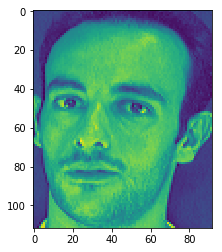

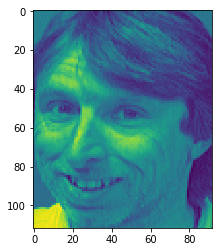

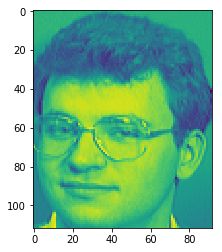

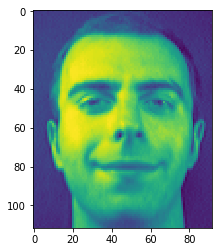

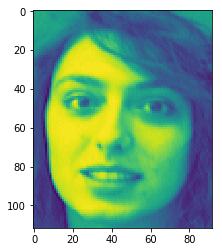

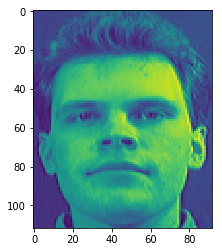

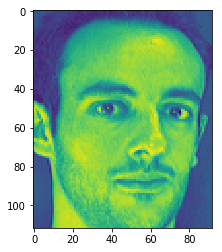

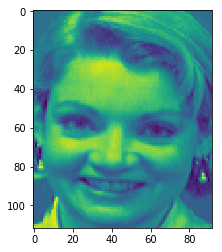

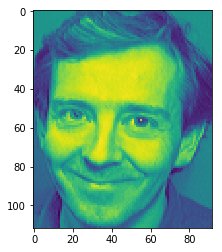

In [13]:
for i in range(1,10):
    j = randint(1,400)
    plt.imshow(data_labelled['Image'][j])
    plt.show()

In [14]:
print(len(data_labelled))

400


In [15]:
data_labelled

,Image,Label
0,"[[0.18823529411764706, 0.19215686274509805, 0....",1
1,"[[0.13333333333333333, 0.13333333333333333, 0....",1
2,"[[0.23529411764705882, 0.23529411764705882, 0....",1
3,"[[0.15294117647058825, 0.17254901960784313, 0....",1
4,"[[0.24705882352941178, 0.20784313725490197, 0....",1
5,"[[0.25098039215686274, 0.2980392156862745, 0.3...",1
6,"[[0.16862745098039217, 0.19607843137254902, 0....",1
7,"[[0.1607843137254902, 0.1843137254901961, 0.18...",1
8,"[[0.17254901960784313, 0.16862745098039217, 0....",1
9,"[[0.16470588235294117, 0.1607843137254902, 0.1...",1


### Reshaping image Data

In [16]:
imagesCount=len(data_labelled['Image'])
for i in range(imagesCount):
    img = data_labelled['Image'][i]
    data_labelled['Image'][i] = img.reshape(img.shape[0]*img.shape[1])

In [17]:
print(data_labelled['Image'][1])

[0.13333333 0.13333333 0.12941176 ... 0.14509804 0.15686275 0.12941176]


### Train-Test Split

In [18]:
train_X, test_X, train_y, test_y = ([],[],[],[])

In [19]:
mul = [10*i for i in range(1,41) ]
for i in range(0,400):
    if(i>0  and (i+1 in  mul)):
        test_X.append(data_labelled['Image'][i])
        test_y.append(data_labelled['Label'][i])
    else:
        train_X.append(data_labelled['Image'][i])
        train_y.append(data_labelled['Label'][i])

In [20]:
train_image_vectors = []
for i in test_X:
    train_image_vectors.append(i.tolist())
    
test_image_vectors = []
for j in test_X:
    test_image_vectors.append(j.tolist())

### Converting images to Matrix

In [21]:
images_matrix = np.matrix(train_image_vectors)

### PCA with 90% of the variance explained

In [22]:
pca = decomposition.PCA(.90)
pca.fit(images_matrix)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.n_components_

24

24 principal components are enough to explain 90% of the variance

In [24]:
train_image = pca.transform(np.asmatrix(train_image_vectors,dtype='float64'))
test_image = pca.transform(np.asmatrix(test_image_vectors,dtype='float64'))

### Model Building using Logistic Regression

In [25]:
lr = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')
lr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Actual and predicted labels

In [26]:
print(test_y[:])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [27]:
predicted = pd.DataFrame(lr.predict(test_X[:]))
lr.predict(test_X[:])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 11, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39,  5], dtype=int64)

### Accuracy

In [28]:
print('Accuracy Score:')
print(lr.score(test_X[:], test_y)*100)

Accuracy Score:
95.0


In [29]:
scores = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='micro'),
           'recall' : make_scorer(recall_score,average='micro'), 
           'f1_score' : make_scorer(f1_score,average='micro')}
img_vectors = np.matrix(data_labelled['Image']) 
lb = np.matrix(data_labelled['Label']) 
model = LogisticRegression(random_state=42,multi_class='ovr').fit(train_X,train_y)

### Stratified K-Fold Cross Validation

In [30]:
skf_cv = StratifiedKFold(n_splits=9, random_state=0)
result = cross_validate(estimator=model,
                                          X=train_X,
                                          y=train_y,
                                          cv=skf_cv,
                                          scoring=scores)
cv_results = pd.DataFrame.from_dict(result)
cv_results

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1_score,train_f1_score
0,29.751345,0.046874,0.975,1.0,0.975,1.0,0.975,1.0,0.975,1.0
1,28.326205,0.031245,0.925,1.0,0.925,1.0,0.925,1.0,0.925,1.0
2,27.810611,0.046871,1.000,1.0,1.000,1.0,1.000,1.0,1.000,1.0
3,27.272137,0.046889,1.000,1.0,1.000,1.0,1.000,1.0,1.000,1.0
4,27.933236,0.031250,1.000,1.0,1.000,1.0,1.000,1.0,1.000,1.0
5,28.279324,0.046874,1.000,1.0,1.000,1.0,1.000,1.0,1.000,1.0
6,30.826030,0.046873,0.975,1.0,0.975,1.0,0.975,1.0,0.975,1.0
7,42.764162,0.050722,0.950,1.0,0.950,1.0,0.950,1.0,0.950,1.0
8,38.262795,0.040290,0.950,1.0,0.950,1.0,0.950,1.0,0.950,1.0


### Classification Results

In [31]:
avg_p = cv_results.test_precision.mean()
avg_r = cv_results.test_recall.mean()
avg_f1 = cv_results.test_f1_score.mean()
print ("Average_Precision = {} ,Average_Recall = {} ,Average_F1Score = {}".format(avg_p,avg_r,avg_f1))

Average_Precision = 0.9750000000000001 ,Average_Recall = 0.9750000000000001 ,Average_F1Score = 0.9750000000000001


In [32]:
test_pred=[]
i=1
for img in test_X:
    a=model.predict(img.reshape(1,-1))
    test_pred.append(a)
    i+=1
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00    

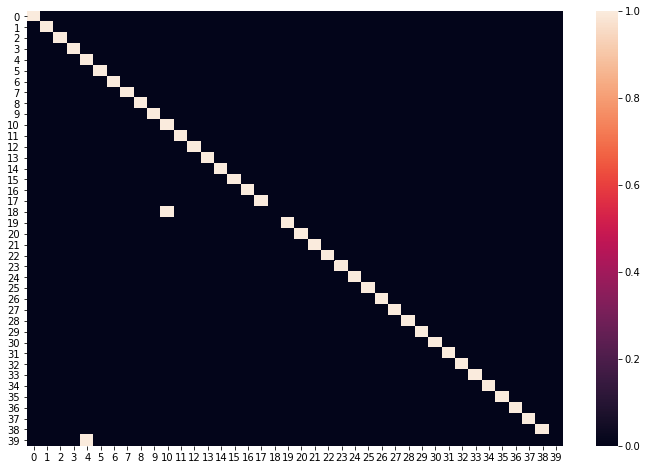

In [33]:
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(test_y, predicted))

In [34]:
test_final = pd.concat([pd.DataFrame(test_y),predicted],axis=1)
test_final.columns = ["Actual", "Predicted"]

In [35]:
print(test_final)

    Actual  Predicted
0        1          1
1        2          2
2        3          3
3        4          4
4        5          5
5        6          6
6        7          7
7        8          8
8        9          9
9       10         10
10      11         11
11      12         12
12      13         13
13      14         14
14      15         15
15      16         16
16      17         17
17      18         18
18      19         11
19      20         20
20      21         21
21      22         22
22      23         23
23      24         24
24      25         25
25      26         26
26      27         27
27      28         28
28      29         29
29      30         30
30      31         31
31      32         32
32      33         33
33      34         34
34      35         35
35      36         36
36      37         37
37      38         38
38      39         39
39      40          5
